In [205]:
import csv
import itertools 
from collections import Counter
import more_itertools as mit

# Visualization
import random
import numpy
from matplotlib import pyplot

# Statistics
import statistics
import numpy

In [185]:
# Files to inspect
emb_nlp_results = '/home/anjani/distant-cto/ResultInspection/ebm_test.csv'
hilfiker_results = '/home/anjani/distant-cto/ResultInspection/hilfiker.csv'

In [202]:
def median(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0

In [186]:
def plotData(false_positive_ratios_neg, false_positive_ratios_pos, data_type):
    bins = numpy.linspace(0, 20, 100)

    pyplot.hist(false_positive_ratios_neg, bins, alpha=0.5, label='FP ' + data_type + ' in negative sentences')
    pyplot.hist(false_positive_ratios_pos, bins, alpha=0.5, label='FP ' + data_type + ' in positive sentences')
    pyplot.xlabel('Ratio', fontsize=18)
    pyplot.ylabel('Frequency', fontsize=18)
    pyplot.legend(loc='upper right')
    pyplot.show()

In [191]:
def getFreq(tokens_, predictions_, groundtruths_):
    false_positive_ratios_neg = []
    false_positive_ratios_pos = []
    false_positive_len_neg = []
    false_positive_len_pos = []

    for token_i, pred_i, ground_i in zip(tokens_, predictions_, groundtruths_):

        if len(token_i) == 1 and token_i[0] == '[CLS]':
            pass
        else:

            ground_int = [int(float(x)) for x in ground_i]
            predictions_int = [int(float(x)) for x in pred_i]
            sentence_length = len(token_i)

            # Negative sentence
            if sum(ground_int) == 0:

                collated_neg = ['{}{}'.format(*i) for i in zip( predictions_int, ground_int )]
                fp_sequences_neg = list(mit.run_length.encode(collated_neg))
                for eachSeq in fp_sequences_neg:
                    if '10' in eachSeq[0]:
                        if eachSeq[1] > 0:
                            fp_counter_ratio = sentence_length / eachSeq[1]
                            false_positive_ratios_neg.append( fp_counter_ratio )
                            false_positive_len_neg.append( eachSeq[1] )

            # Positive sentence
            elif sum(ground_int) > 0:

                collated = ['{}{}'.format(*i) for i in zip( predictions_int, ground_int )]
                fp_sequences = list(mit.run_length.encode(collated))
                for eachSeq in fp_sequences:
                    if '10' in eachSeq[0]:
                        if eachSeq[1] > 0:
                            fp_counter_ratio = sentence_length / eachSeq[1]
                            false_positive_ratios_pos.append( fp_counter_ratio )
                            false_positive_len_pos.append( eachSeq[1] )
                            
    return false_positive_ratios_neg, false_positive_ratios_pos, false_positive_len_neg, false_positive_len_pos

In [192]:
def isplit(iterable,splitters):
    return [list(g) for k,g in itertools.groupby(iterable,lambda x:x in splitters)]

In [214]:
def getData(input_file):
    with open(input_file, 'r') as results:
        csv_reader = csv.reader(results, delimiter='\t')
        next(results)

        tokens = []
        predictions = []
        groundtruths = []
        

        for row in csv_reader:
            index = row[0]
            token = row[1]
            predicted = row[2]
            groundtruth = row[3]

            tokens.append(token)

            if '[CLS]' in token:
                predictions.append('[CLS]')
                groundtruths.append('[CLS]')
            else:
                predictions.append(predicted)
                groundtruths.append(groundtruth)
                
    tokens_ = isplit(tokens ,('[CLS]',))
    predictions_ = isplit(predictions ,('[CLS]',))
    groundtruths_ = isplit(groundtruths ,('[CLS]',))

    assert len(tokens_) == len(predictions_) == len(groundtruths_)
    
    false_positive_ratios_neg, false_positive_ratios_pos, false_positive_len_neg, false_positive_len_pos = getFreq(tokens_, predictions_, groundtruths_)
    
    # Basic statistics
    plotData(false_positive_ratios_neg, false_positive_ratios_pos, 'ratio')
    print('The mean of false-positive ratios in the negative sentences is : ', statistics.mean(false_positive_ratios_neg))
    print('The median of false-positive ratios in the negative sentences is : ', median(false_positive_ratios_neg))
    fp_ratios_neg_c = Counter(false_positive_ratios_neg)
    print('The mode of false-positive ratios in the negative sentences is : ',fp_ratios_neg_c.most_common(1))
    std_ratio_neg = numpy.array(false_positive_ratios_neg)
    print('The standard dev of false-positive ratios in the negative sentences is : ', numpy.std(std_ratio_neg, axis=0) )
    
    print('The mean of false-positive ratios in the positive sentences is : ', statistics.mean(false_positive_ratios_pos))
    print('The median of false-positive ratios in the positive sentences is : ', median(false_positive_ratios_pos))
    fp_ratios_pos_c = Counter(false_positive_ratios_pos)
    print('The mode of false-positive ratios in the negative sentences is : ',fp_ratios_pos_c.most_common(1))
    std_ratio_pos = numpy.array(false_positive_ratios_pos)
    print('The standard dev of false-positive ratios in the positive sentences is : ', numpy.std(std_ratio_pos, axis=0) )
    
    
    plotData(false_positive_len_neg, false_positive_len_pos, 'length')
    print('The mean of false-positive lengths in the negative sentences is : ', statistics.mean(false_positive_len_neg))
    print('The mean of false-positive lengths in the positive sentences is : ', statistics.mean(false_positive_len_pos))
    

    
    return None

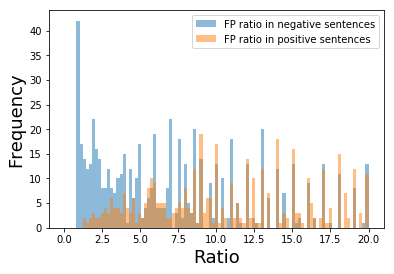

The mean of false-positive ratios in the negative sentences is :  10.823177525546365
The median of false-positive ratios in the negative sentences is :  7.5
The mode of false-positive ratios in the negative sentences is :  [(1.0, 42)]
The standard dev of false-positive ratios in the negative sentences is :  10.495887610834355
The mean of false-positive ratios in the positive sentences is :  20.44915268022079
The median of false-positive ratios in the positive sentences is :  17.0
The mode of false-positive ratios in the negative sentences is :  [(26.0, 20)]
The standard dev of false-positive ratios in the positive sentences is :  15.512914643246086


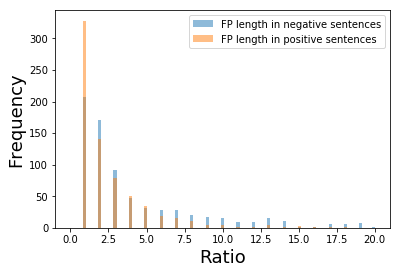

The mean of false-positive lengths in the negative sentences is :  4.577807848443843
The mean of false-positive lengths in the positive sentences is :  2.6386913229018494


In [215]:
getData(emb_nlp_results)